Notebook is realized by *Volodymyr Motyka* and *Jaroslav Stepanyak*



A Novel Architecture for Web-Based Attack Detection Using
Convolution Neural Network
Adem TEKEREK
PII: S0167-4048(20)30369-2
DOI: https://doi.org/10.1016/j.cose.2020.102096

Reference: COSE 102096
To appear in: Computers & Security
Received date: 13 April 2020
Revised date: 29 September 2020
Accepted date: 22 October 2020

Please cite this article as: Adem TEKEREK , A Novel Architecture for Web-Based Attack
Detection Using Convolution Neural Network, Computers & Security (2020), 
doi:https://doi.org/10.1016/j.cose.2020.102096

___

The main problem here is to preprocess data.

Preprocessing data consists of 2 steps:
1. Producing dictionary
2. Producing matrixes

More details below

___
First of all, import necessary modules and import anomalous data (only with anomalies) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv("anomalousTrafficTest.txt",sep="/n/n", header= None)
raw_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\3144564507.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv("anomalousTrafficTest.txt",sep="/n/n", header= None)


,0
0,GET http://localhost:8080/tienda1/publico/anad...
1,User-Agent: Mozilla/5.0 (compatible; Konqueror...
2,Pragma: no-cache
3,Cache-control: no-cache
4,"Accept: text/xml,application/xml,application/x..."
...,...
305641,"Accept-Charset: utf-8, utf-8;q=0.5, *;q=0.5"
305642,Accept-Language: en
305643,Host: localhost:8080
305644,Cookie: JSESSIONID=3CC12010CDA952F123240EBAD79...


We have realy bad data, so we need to clean it

The most important data are in rows, which starts with "GET"
So, we select only those rows and delete words "GET" and "HTTP/1.1"

After that, we have URL and their Payloads, we split them into two columns

In [2]:
URL_Payload = raw_data[raw_data[0].str.contains('GET') == True ]

URL_Payload.loc[:, 0] = URL_Payload[0].apply(lambda x: 
    x.replace("GET ", "").replace(" HTTP/1.1",""))
# Split the data at the '?' character
URL_Payload[['URL', 'payload']] = URL_Payload[0].str.split('?', expand=True)
URL_Payload = URL_Payload[['URL', 'payload']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\4087905454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  URL_Payload.loc[:, 0] = URL_Payload[0].apply(lambda x:
C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\4087905454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  URL_Payload[['URL', 'payload']] = URL_Payload[0].str.split('?', expand=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\4087905454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Now import necessary modules for producing dictionary

In [3]:
import nltk
import re

In [4]:
# Initialize an empty dictionary
dict_filter = {}

# Iterate over the rows in the dataframe
for rdata in URL_Payload[URL_Payload['payload'].notna()].payload:
  # Tokenize the data using the '&' delimiter
  words = nltk.tokenize.regexp_tokenize(rdata, pattern=r"&", gaps=True)
  # Iterate over the words
  for word in words:
    # Check if the word is in the dictionary
    if word not in dict_filter:
      # If not, add it with a count of 1
      dict_filter[word] = 1
    else:
      # If it is, increment the count
      dict_filter[word] += 1

We've produced the dictionary dict_filter.
In the next step, we will use it as a filter.

In [5]:
dict_filter

{'id=2': 375,
 'nombre=Jam%F3n+Ib%E9rico': 318,
 'precio=85': 334,
 'cantidad=%27%3B+DROP+TABLE+usuarios%3B+SELECT+*+FROM+datos+WHERE+nombre+LIKE+%27%25': 3,
 'B1=A%F1adir+al+carrito': 1192,
 'id=2%2F': 46,
 'cantidad=49': 7,
 'modo=entrar': 1183,
 'login=bob%40%3CSCRipt%3Ealert%28Paros%29%3C%2FscrIPT%3E.parosproxy.org': 5,
 'pwd=84m3ri156': 2,
 'remember=on': 554,
 'B1=Entrar': 1173,
 'login=grimshaw': 2,
 'pwd=G%2F%2FlAc%2CIAr': 1,
 'rememberA=on': 42,
 'idA=2': 251,
 'errorMsg=%2B': 10,
 'errorMsgA=Credenciales+incorrectas': 444,
 'modo=insertar': 1064,
 'precio=183%27%2C%270%27%2C%270%27%29%3Bwaitfor+delay+%270%3A0%3A15%27%3B--': 1,
 'B1=Pasar+por+caja': 281,
 'precio=183': 2,
 'B1=Pasar+por+caja%2F': 214,
 'B1A=Pasar+por+caja': 68,
 'modo=registro%253CSCRIPT%253Ealert%2528%2522Paros%2522%2529%253B%253C%252FSCRIPT%253E': 1,
 'login=armand': 3,
 'password=prusiato': 4,
 'nombre=Samia': 3,
 'apellidos=Catalayud+Mirabet': 4,
 'email=balademas.mareuil6%40enlanzarote.com.vc': 4,
 'dni=2

This is the second step: matrixes production.
For that we produced function

The function produce_matrixs_df takes in two arguments: 'samples' and 'dict_filter'.

'samples' is a list of samples, and 'dict_filter' is a dictionary.

The function initializes an empty list called 'matrixs_df' to store the matrices that will be generated.

It then iterates over the samples list, and for each sample, it creates a matrix of zeros with dimensions (15000,). It tokenizes the sample using the '&' character as the delimiter, and creates a new dictionary called 'dict_v2' with keys corresponding to the tokenized elements and values of 1 if the element is in the dict_filter dictionary, or 0 otherwise.

The function then gets the keys of the 'dict_filter' dictionary and stores them in a list called 'dict_filter_keys'. It then iterates over the keys in 'dict_v2', and for each key, it searches for the corresponding index in the list of keys from 'dict_filter'. If a match is found, it sets the value of the matrix at this index to 1.

Finally, the function reshapes the matrix to dimensions (150,100) and appends it to the list of matrices, 'matrixs_df'.

Once all of the samples have been processed, the function returns the list of matrices, 'matrixs_df'.

In [7]:
def produce_matrixs_df(samples, dict_filter):
    # Initialize an empty list to store the matrices
    matrixs_df = []
    
    # Iterate over the samples
    for sample in samples:
        # Initialize a matrix of zeros with dimensions (19600,)
        matrix = np.zeros((15000))
        
        # Tokenize the sample using the '&' character as the delimiter
        sample_tokenized = nltk.tokenize.regexp_tokenize(sample, pattern=r"&", gaps=True)
        
        # Create a dictionary with keys corresponding to the tokenized elements
        # and values of 1 if the element is in the dict_filter dictionary, or 0 otherwise
        dict_v2 = {}
        for el in sample_tokenized:
            if el in dict_filter:
                dict_v2[el] = 1
            else:
                dict_v2[el] = 0
        
        # Get the keys of the dict_filter dictionary
        dict_filter_keys = list(dict_filter.keys())

        # Iterate over the keys in the new dictionary, and find the corresponding index in the list of keys from dict_filter
        for key in dict_v2.keys():
            for i, df_key in enumerate(dict_filter_keys):
                if key == df_key:
                    # Set the value of the matrix at this index to 1
                    matrix[i] = 1
                    
        # Reshape the matrix to dimensions (140, 140) and append it to the list of matrices
        matrixs_df.append(matrix.reshape(150,100))
    
    # Return the list of matrices
    return matrixs_df

Upload data with normal traffic and preprocess them the same way we did it with data at the start

In [8]:
raw_data_norm_train = pd.read_csv("normalTrafficTraining.txt",sep="/n/n", header= None)
raw_data_norm_test = pd.read_csv("normalTrafficTest.txt",sep="/n/n", header= None)
raw_data_norm = pd.concat([raw_data_norm_train,raw_data_norm_test])

URL_Payload_norm = raw_data_norm[raw_data_norm[0].str.contains('GET') == True ]

URL_Payload_norm.loc[:, 0] = URL_Payload_norm[0].apply(lambda x: 
    x.replace("GET ", "").replace(" HTTP/1.1",""))
# Split the data at the '?' character
URL_Payload_norm[['URL', 'payload']] = URL_Payload_norm[0].str.split('?', expand=True)
URL_Payload_norm = URL_Payload_norm[['URL', 'payload']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\3543599310.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data_norm_train = pd.read_csv("normalTrafficTraining.txt",sep="/n/n", header= None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\3543599310.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data_norm_test = pd.read_csv("normalTrafficTest.txt",sep="/n/n", header= None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16392\3543599310.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Produce matrix for every HTTP request of normal traffic. Then create dataframe and label them as all as 0 (which means there's no web-attack in the URL)

In [9]:
samples_ = URL_Payload_norm[URL_Payload_norm["payload"].notnull()]
samples_ = samples_["payload"]

res = produce_matrixs_df(samples_,dict_filter) 
df_norm = pd.DataFrame({'matrix': res, 'label': 0})

Produce matrix for every HTTP request of anomalous traffic. Then create dataframe and label them as all as 1 (which means there's a web-attack in the URL)

In [10]:
samples_ = URL_Payload[URL_Payload["payload"].notnull()]
samples_ = samples_["payload"]

res = produce_matrixs_df(samples_,dict_filter) 
df_anom = pd.DataFrame({'matrix': res, 'label': 1})

In [11]:
df = pd.concat([df_norm,df_anom])
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

We have dataframe with labeled matrixes, we will use it for our CNN model

In [12]:
df

,matrix,label
0,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",0
2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
...,...,...
25604,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
25605,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
25606,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
25607,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1


In [13]:
df['matrix'][0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

The following code is visualising one matrix. White pixels represent anomalies, black pixels represent normal payloads 

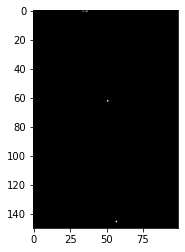

In [14]:
mat=np.asarray(df['matrix'][14607]).astype('float32')


plt.imshow(mat, cmap='gray')  # Display the matrix as an image using a grayscale colormap
plt.show()

___
Here we are building our CNN, but before that we need to split our dataset into train and test datasets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['matrix'], df['label'], test_size=0.2, random_state=42)

In [16]:
X_train.shape

(20487,)

We cannot use the 'X_train' and 'X_test' for fitting any CNN model

So we need to change shape of the variables

In [17]:
X_train = np.stack(X_train, axis=0)

# Add an additional dimension for the channels
X_train = np.expand_dims(X_train, axis=-1)

X_test = np.stack(X_test, axis=0)

# Add an additional dimension for the channels
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape

Now, we're creating our CNN model

The scheme is below

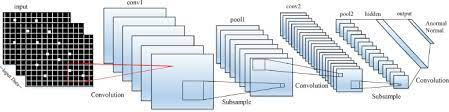

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
# Define the input shape for the matrices
input_shape = (150, 100, 1)

# Create the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3),padding="same", activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3),padding="same", activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
641/641 [==============================] - 120s 186ms/step - loss: 0.2077 - accuracy: 0.9167
Epoch 2/5
641/641 [==============================] - 133s 208ms/step - loss: 0.0458 - accuracy: 0.9858
Epoch 3/5
641/641 [==============================] - 128s 200ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 4/5
641/641 [==============================] - 125s 195ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 5/5
641/641 [==============================] - 124s 194ms/step - loss: 0.0086 - accuracy: 0.9972


In [21]:
model.evaluate(X_test, y_test)

161/161 [==============================] - 8s 47ms/step - loss: 0.1262 - accuracy: 0.9721


[0.12623293697834015, 0.9720812439918518]

In [22]:
history.history

{'loss': [0.20774871110916138,
  0.04583318158984184,
  0.022237390279769897,
  0.014348235912621021,
  0.008562609553337097],
 'accuracy': [0.9167276620864868,
  0.9857958555221558,
  0.993800938129425,
  0.9955581426620483,
  0.9971689581871033]}

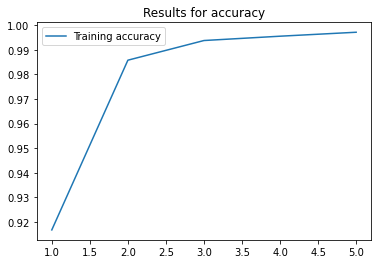

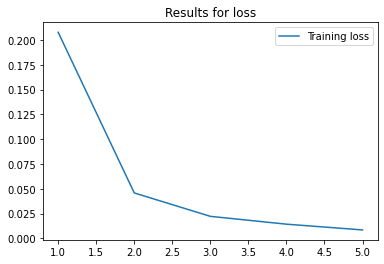

In [23]:
for i in ['accuracy', 'loss']:
    acc = history.history[i]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training {}'.format(i))
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()